### 스팸메일 분류하기
캐글에서 제공하는 스팸 메일 데이터를 학습시켜 스팸 메일 분류기를 구현한다.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [13]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/10.%20RNN%20Text%20Classification/dataset/spam.csv", filename="spam.csv")
data = pd.read_csv('spam.csv', encoding='latin1')
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 5572


In [14]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Unnamed라는 이름의 3개의 열은 텍스트 분류 시 불필요한 열이다. v1열은 해당 메일이 정상적인 메일인지 아닌지를 나타내는 label에 해당되는 열이고, ham은 정상메일, spam은 스팸메일을 의미한다. v2열은 메일의 본문을 담고 있다.

따라서 불필요한 열들은 삭제하고, v1열에 있는 ham과 spam을 0과 1의 숫자로 변경한다.

In [15]:
data = data.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])
data['v1'] = data['v1'].map({"ham" : 0, "spam" : 1})
data.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [17]:
data.isna().sum() # 결측치 확인

v1    0
v2    0
dtype: int64

In [19]:
print("v2열의 유니크한 값 : ", data['v2'].value_counts())

v2열의 유니크한 값 :  Sorry, I'll call later                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                    12
Ok...                                                                                                                                                                  10
7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\"... good morning dear"               4
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...     4
                                                                                                                                       

value_counts()를 실행한 결과 length가 5169라는 결과를 내뱉고 있다. 총 5572개의 값임을 감안하면 뭔가 겹치는 값이 있음을 의미하며, 중복 샘플을 제거해본다.

In [20]:
data.drop_duplicates(subset=["v2"], inplace=True)
print("총 샘플의 수 : ", data.shape) # 중복된 값들이 제거되고서 샘플의 수가 줄어든 모습

총 샘플의 수 :  (5169, 2)


<Axes: >

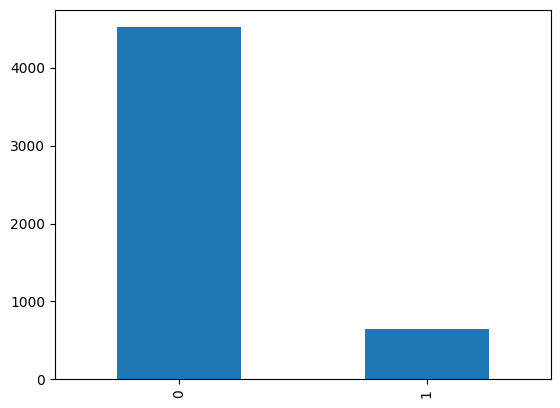

In [21]:
data['v1'].value_counts().plot(kind = 'bar')

레이블이 대부분 0에 편중되어 있는데, 이는 스팸 메일 데이터의 대부분의 메일이 정상 메일임을 의미한다. 정확한 수치를 파악해보겠습니다. 

In [22]:
print("정상 메일과 스팸 메일의 개수")
print(data.groupby('v1').size().reset_index(name = "count"))

정상 메일과 스팸 메일의 개수
   v1  count
0   0   4516
1   1    653
